In [76]:
import pandas as pd
import warnings 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import re
import json
import nltk
# import spacy
import string
import unicodedata
from textblob import TextBlob
from nltk.stem import WordNetLemmatizer

In [77]:
df = pd.read_csv("translated_comments.csv")

In [78]:
df

,Unnamed: 0,extracted_comments,comments_date,translated_comments
0,0,Trovo:,2022-06-12 18:54:50,Trovo:
1,1,Tokyo is one of the best team-deleting players...,2022-06-12 18:54:50,Tokyo is one of the best team-deleting players...
2,2,Not only that you are the most underrated but ...,2022-06-12 18:54:50,Not only that you are the most underrated but ...
3,3,1:24,2022-07-12 18:54:50,1:24
4,4,I watched many streamers but I think you’re nu...,2022-06-12 18:54:50,I watched many streamers but I think you’re nu...
...,...,...,...,...
6661,6661,Good wow mantap,2022-06-12 18:54:50,Good wow mantap
6662,6662,BROOOOOOOO,2022-07-12 18:54:50,BROOOOOOOO
6663,6663,Ur noob,2022-06-12 18:54:50,Ur noob
6664,6664,op,2022-06-12 18:54:50,op


In [84]:
df = df.drop(["Unnamed: 0"], axis = 1)
df

,date_time,translated_comments,year,month,day,hour,min
0,2022-06-12 18:54:50,Trovo:,2022,June,12,18,54
1,2022-06-12 18:54:50,Tokyo is one of the best team-deleting players...,2022,June,12,18,54
2,2022-06-12 18:54:50,Not only that you are the most underrated but ...,2022,June,12,18,54
3,2022-07-12 18:54:50,1:24,2022,July,12,18,54
4,2022-06-12 18:54:50,I watched many streamers but I think you’re nu...,2022,June,12,18,54
...,...,...,...,...,...,...,...
6661,2022-06-12 18:54:50,Good wow mantap,2022,June,12,18,54
6662,2022-07-12 18:54:50,BROOOOOOOO,2022,July,12,18,54
6663,2022-06-12 18:54:50,Ur noob,2022,June,12,18,54
6664,2022-06-12 18:54:50,op,2022,June,12,18,54


In [85]:
def time_line_extractor(f):
    import pandas as pd
    import datetime as dt

    f = pd.read_csv("translated_comments.csv")
    f = f.drop(columns=["extracted_comments"], axis=1)
    # df.rename(columns={"translated comments": "translated_comments"}, inplace=True)
    # dt = []
    # for i in df["comments_date"]:
    #     date = i[0:10]
    #     # time = i[-9:-1]
    #     # dt.append(" ".join([date, time]))
    #     dt.append(date)

    # df["dt"] = dt
    # df = df.drop(["comments_date"], axis=1)
    f["comments_date"] = pd.to_datetime(f["comments_date"])
    f["year"] = f["comments_date"].dt.year
    f["month"] = f["comments_date"].dt.month_name()
    f["day"] = f["comments_date"].dt.day
    f["hour"] = f["comments_date"].dt.hour
    f["min"] = f["comments_date"].dt.minute
    f.rename(columns={"comments_date": "date_time"}, inplace=True)
    return f

In [89]:
df = time_line_extractor(df)
df = df.drop(["Unnamed: 0"], axis = 1)
df

,date_time,translated_comments,year,month,day,hour,min
0,2022-06-12 18:54:50,Trovo:,2022,June,12,18,54
1,2022-06-12 18:54:50,Tokyo is one of the best team-deleting players...,2022,June,12,18,54
2,2022-06-12 18:54:50,Not only that you are the most underrated but ...,2022,June,12,18,54
3,2022-07-12 18:54:50,1:24,2022,July,12,18,54
4,2022-06-12 18:54:50,I watched many streamers but I think you’re nu...,2022,June,12,18,54
...,...,...,...,...,...,...,...
6661,2022-06-12 18:54:50,Good wow mantap,2022,June,12,18,54
6662,2022-07-12 18:54:50,BROOOOOOOO,2022,July,12,18,54
6663,2022-06-12 18:54:50,Ur noob,2022,June,12,18,54
6664,2022-06-12 18:54:50,op,2022,June,12,18,54


In [90]:
df.columns

Index(['date_time', 'translated_comments', 'year', 'month', 'day', 'hour',
       'min'],
      dtype='object')

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6666 entries, 0 to 6665
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   date_time            6666 non-null   datetime64[ns]
 1   translated_comments  6666 non-null   object        
 2   year                 6666 non-null   int64         
 3   month                6666 non-null   object        
 4   day                  6666 non-null   int64         
 5   hour                 6666 non-null   int64         
 6   min                  6666 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 364.7+ KB


In [92]:
df.describe()

,year,day,hour,min
count,6666.0,6666.000000,6666.0,6666.0
mean,2022.0,11.911941,18.0,54.0
std,0.0,1.433566,0.0,0.0
min,2022.0,6.000000,18.0,54.0
25%,2022.0,12.000000,18.0,54.0
50%,2022.0,12.000000,18.0,54.0
75%,2022.0,12.000000,18.0,54.0
max,2022.0,29.000000,18.0,54.0


In [93]:
df.isnull().sum()

date_time              0
translated_comments    0
year                   0
month                  0
day                    0
hour                   0
min                    0
dtype: int64

In [94]:
df.head()

,date_time,translated_comments,year,month,day,hour,min
0,2022-06-12 18:54:50,Trovo:,2022,June,12,18,54
1,2022-06-12 18:54:50,Tokyo is one of the best team-deleting players...,2022,June,12,18,54
2,2022-06-12 18:54:50,Not only that you are the most underrated but ...,2022,June,12,18,54
3,2022-07-12 18:54:50,1:24,2022,July,12,18,54
4,2022-06-12 18:54:50,I watched many streamers but I think you’re nu...,2022,June,12,18,54


In [95]:
df.shape

(6666, 7)

# data cleaning


In [96]:
def clean_text(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text)
    text = re.sub(r'#', '', text)
    text = re.sub(r'RT[\s]+', '', text)
    text = re.sub(r'https?:\/\/\S+', '', text)
    
    return text 

In [97]:
df["translated_comments"] = df["translated_comments"].apply(clean_text)

In [98]:
def convert_lower(text):
    return text.lower()

df["translated_comments"] = df["translated_comments"].apply(convert_lower)

In [99]:
def remove_special(text):
    
    x = ''
    
    for i in text:
        if i.isalnum():
            x = x+i
        else:
            x = x + ' '
    return x

df["translated_comments"] = df["translated_comments"].apply(remove_special)

In [100]:
import nltk
from nltk.corpus import stopwords


In [101]:
def remove_stopwords(text):
    x = []
    
    for i in text.split():
        
        if i not in stopwords.words("english"):
            x.append(i)
    
    y =x[:]
    x.clear()
    return y

df["translated_comments"] = df["translated_comments"].apply(remove_stopwords)

In [102]:
def join_back(list):
    return " ".join(list)

df["translated_comments"] = df["translated_comments"].apply(join_back)

In [103]:
def get_polarity(text):
    return TextBlob(text).sentiment.polarity

def get_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

df["Polarity"] = df["translated_comments"].apply(get_polarity)
df["Subjectivity"] = df["translated_comments"].apply(get_subjectivity)

In [104]:
df.head()

,date_time,translated_comments,year,month,day,hour,min,Polarity,Subjectivity
0,2022-06-12 18:54:50,trovo,2022,June,12,18,54,0.000000,0.000000
1,2022-06-12 18:54:50,tokyo one best team deleting players ever seen,2022,June,12,18,54,1.000000,0.300000
2,2022-06-12 18:54:50,underrated also amongst best player codm br co...,2022,June,12,18,54,1.000000,0.300000
3,2022-07-12 18:54:50,1 24,2022,July,12,18,54,0.000000,0.000000
4,2022-06-12 18:54:50,watched many streamers think number 1 world no...,2022,June,12,18,54,0.483333,0.583333


In [105]:
def get_analysis(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    elif score > 0:
        return "Positive"
    
df["Analysis"] = df["Polarity"].apply(get_analysis)

In [106]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [108]:
X = cv.fit_transform(df["translated_comments"]).toarray()

In [109]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [110]:
X.shape

(6666, 781)

In [112]:
# uncomment the below script to run the script and view the plot

# plt.figure(figsize=(8, 6))
# for i in range(0, df.shape[0]):
#     plt.scatter(df["Polarity"][i], df["Subjectivity"][i], color = "Blue")
    
# plt.title("Sentiment analysis")
# plt.xlabel("Polarity")
# plt.ylabel("Subjectivity")

# plt.show()

In [113]:
df["Analysis"].replace({"Positive" : 1, "Negative" : -1, "Neutral" : 0}, inplace=True)

In [114]:
df

,date_time,translated_comments,year,month,day,hour,min,Polarity,Subjectivity,Analysis
0,2022-06-12 18:54:50,trovo,2022,June,12,18,54,0.000000,0.000000,0
1,2022-06-12 18:54:50,tokyo one best team deleting players ever seen,2022,June,12,18,54,1.000000,0.300000,1
2,2022-06-12 18:54:50,underrated also amongst best player codm br co...,2022,June,12,18,54,1.000000,0.300000,1
3,2022-07-12 18:54:50,1 24,2022,July,12,18,54,0.000000,0.000000,0
4,2022-06-12 18:54:50,watched many streamers think number 1 world no...,2022,June,12,18,54,0.483333,0.583333,1
...,...,...,...,...,...,...,...,...,...,...
6661,2022-06-12 18:54:50,good wow mantap,2022,June,12,18,54,0.400000,0.800000,1
6662,2022-07-12 18:54:50,broooooooo,2022,July,12,18,54,0.000000,0.000000,0
6663,2022-06-12 18:54:50,ur noob,2022,June,12,18,54,0.000000,0.000000,0
6664,2022-06-12 18:54:50,op,2022,June,12,18,54,0.000000,0.000000,0


In [115]:
df.Analysis.value_counts()

 0    3938
 1    2178
-1     550
Name: Analysis, dtype: int64

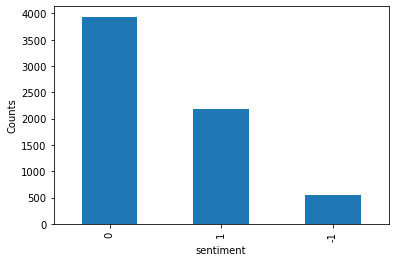

In [116]:

plt.xlabel("sentiment")
plt.ylabel("Counts")
df.Analysis.value_counts().plot(kind = "bar")
plt.show()

In [117]:
y = df.iloc[:, -1].values
y

array([0, 1, 1, ..., 0, 0, 0], dtype=int64)

# Model building

In [118]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [119]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

In [120]:
clf1 = GaussianNB()
clf2 = BernoulliNB()
clf3 = MultinomialNB()

In [121]:
clf1.fit(X_train, y_train)
clf2.fit(X_train, y_train)
clf3.fit(X_train, y_train)


MultinomialNB()

In [122]:
y_pred1 = clf1.predict(X_test)
y_pred2 = clf2.predict(X_test)
y_pred3 = clf3.predict(X_test)

In [123]:
from sklearn.metrics import accuracy_score

In [124]:
print("Gaussian", accuracy_score(y_test, y_pred1))
print("Bernoulli", accuracy_score(y_test, y_pred2))
print("Multinomial", accuracy_score(y_test, y_pred3))


Gaussian 0.8380809595202399
Bernoulli 0.9752623688155923
Multinomial 0.9662668665667167


In [125]:
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image

In [127]:
analysis_neg = df["translated_comments"][df["Analysis"] == -1]
analysis_pos = df["translated_comments"][df["Analysis"] == 1]

In [128]:
def list_tokenizer(a):
    a = " ".join(a)
    a = nltk.word_tokenize(a)
    return str(a)

In [129]:
def word_cloud(a, number):
    wc = WordCloud(background_color= "black", max_font_size= 50, max_words= 50)
    wc.generate(a)
    plt.figure(figsize = (10, 8))
    plt.imshow(wc, interpolation= "bilinear")
    plt.title(f"WordCloud for {number}")
    plt.axis("off")

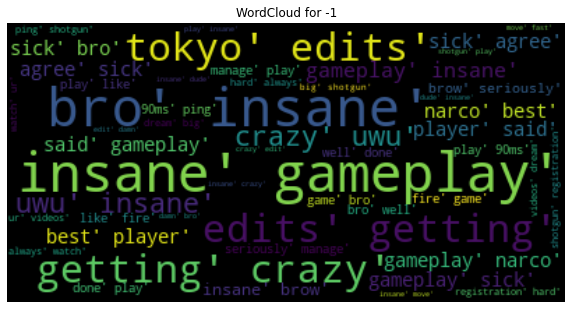

In [130]:
word_cloud(list_tokenizer(analysis_neg), -1)

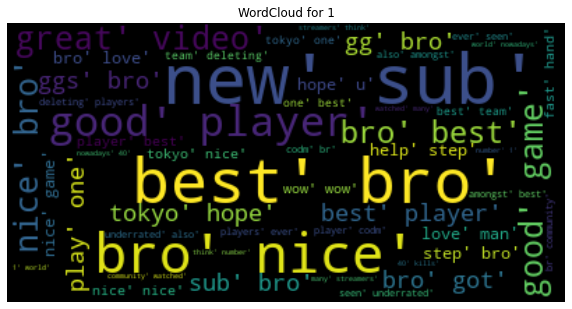

In [131]:
word_cloud(list_tokenizer(analysis_pos ), 1)

In [134]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_features=600) #considering first 600 unique words or features

x = vectorizer.fit_transform(df["translated_comments"]).toarray()

[Text(0, 0, 'new sub'),
 Text(1, 0, 'gg bro'),
 Text(2, 0, 'best bro'),
 Text(3, 0, 'best player'),
 Text(4, 0, 'killing machine'),
 Text(5, 0, 'good player'),
 Text(6, 0, 'help step'),
 Text(7, 0, 'great video'),
 Text(8, 0, '42 kills'),
 Text(9, 0, 'good game'),
 Text(10, 0, 'nice bro'),
 Text(11, 0, 'helal olsun'),
 Text(12, 0, 'insane gameplay'),
 Text(13, 0, 'play one'),
 Text(14, 0, 'ggs bro'),
 Text(15, 0, 'bro got'),
 Text(16, 0, 'play like'),
 Text(17, 0, 'game bro'),
 Text(18, 0, 'step bro'),
 Text(19, 0, 'helal kanka')]

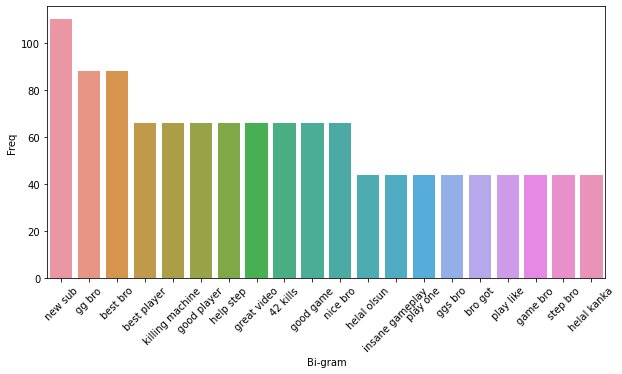

In [136]:
#Bi gram 
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  #for tri-gram, put ngram_range=(3,3)
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

top2_words = get_top_n2_words(df["translated_comments"], n=200) #top 200
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
top2_df.head()

#Bi-gram plot
import matplotlib.pyplot as plt
import seaborn as sns
top20_bigram = top2_df.iloc[0:20,:]
fig = plt.figure(figsize = (10, 5))
plot=sns.barplot(x=top20_bigram["Bi-gram"],y=top20_bigram["Freq"])
plot.set_xticklabels(rotation=45,labels = top20_bigram["Bi-gram"])

